# Jupyter-Notebook zur Experimentalphysik II, SS 2023

von Dr. Markus Merschmeyer, III. Physikalisches Institut A, RWTH Aachen University

## Übungsaufgabe: Magnetfeldberechnung (numerisch)


In [1]:
import numpy as np              # numpy-Paket importieren
from math import *
%matplotlib inline
import matplotlib.pyplot as plt # Paket zur Diagrammerstellung
import scipy.constants as scc   # Naturkonstanten aus "scipy"

In [2]:
mu0  = scc.mu_0 # magnetische Feldkonstante in N A^-2
print("magn. Feldkonstante:  ",mu0,"N A^-2")

# sonstige Parameter
R    = 0.03     # Radius der Leiterschleife in m
print("Radius Leiterschleife:",R,"m")
tmin = 0.0      # Startwert Kurvenparameter
tmax = 1.0      # Endwert Kurvenparameter
print("Kurvenparameter:      ",tmin,"bis",tmax)

magn. Feldkonstante:   1.25663706212e-06 N A^-2
Radius Leiterschleife: 0.03 m
Kurvenparameter:       0.0 bis 1.0


Die Leiterschleife soll durch die Funktion
$$
\vec{s}(t) = \left(\begin{array}{c} R\cdot\cos(2\pi\,t) \\ -R\cdot\sin(2\pi\,t) \\ 0 \end{array}\right)
    \,\mathrm{,} \quad 0 \le t < 1
$$
beschrieben werden. Dabei ist $R$ der Radius der Schleife und $t$ ein Kurvenparameter zur Beschreibung des Weges entlang der Schleife.

In [3]:
def v_loop(R=0.03, t=0.0):
    return R * np.array([np.cos(2*np.pi*t),  # x-Koordinate in m,
                         -np.sin(2*np.pi*t),  # y-Koordinate in m,
                         0]) # z-Koordinate in m

Funktion zur numerischen Berechnung des Magnetfeldes einer Leiterschleife nach Biot-Savart:

In [4]:
def biot_savart(R=0.03, t_min=0.0, t_max=1.0, n_step=10, I=10.0, x=0.0, y=0.0, z=0.1):
    v_B     = np.array([x, y, z])	# Ortsvektor fuer die Feldberechnung initialisieren
    v_Btot  = np.array([0.,0.,0.])  # initialisiere den Summenvektor des B-Feldes
    d_t     = (t_max-t_min) / n_step  # Schrittlaenge entlang einer Spulenwindung berechnen
    
    # berechne Liste mit den Vektor-Wegelementen d\vec{s} entlang der Spule
    v_ds = np.array([v_loop(R, t) - v_loop(R, t+d_t) for t in np.arange(t_min, t_max, d_t)])
    
    # berechne Liste mit Abstandsvektoren vom jeweiligen Ort (v_loop()) auf der Spule zum Ort (v_B),
    # an dem das B-Feld bestimmt werden soll: \vec{r} = v_B - v_loop()
    v_r = np.array([v_B - v_loop(R, t) for t in np.arange(t_min, t_max, d_t)])
    
    # berechne Liste der Kreuzprodukte \vec{r}xd\vec{s}
    crossp = np.cross(v_ds, v_r)
    scalar = mu0 / (4*np.pi) * I * np.sum(v_r**2,axis=1)**(-3/2)
    dB = np.array([scalar[i] * crossp[i] for i in range(n_step)])
    
    # bilde Summe ueber alle Vektoren -> Vektor des B-Felds am Ort \vec{r}
    v_Btot = np.sum(dB, axis=0)

    return v_Btot

biot_savart()

array([ 4.23516474e-22, -9.52912066e-22,  4.64859219e-06])

Die Funktion zur analytischen Berechnung des Magnetfeldes einer Leiterschleife entlang der $z$-Achse lautet (Kap. 4.2.3, Gleichung 27):
$$
  B_z(z) = \frac{\mu_0}{2}\cdot I\cdot \frac{R^2}{{\sqrt{z^2+R^2}}^3}
$$

In [5]:
def Bz_LS(R=0.03, I=10.0, z=0.05):
    return mu0/2 * I * R**2 / (z**2 + R**2)**(3/2)

Vergleich von analytischer und numerischer Berechnung des Bz-Feldes als Funktion des z-Abstands:

In [6]:
fig, ax = plt.subplots(2,2)
fig.set_dpi(1000)
fig.set_figheight(10)
fig.set_figwidth(14)
ax = ax.flat
z = np.linspace(0,0.2,100)
for n in range(4):
    B = np.array([Bz_LS(z=i) for i in z])
    B_num = np.array([biot_savart(z=i,n_step=10*2**n)[2] for i in z])

    #ax[n].title(f"Numerisches vs. analytisches Biot-Savart-Gesetz\n Maximaler relativer Fehler = {max(B_num/B) - 1:.3f}")
    ax[n].plot(z,B,label="$B(z)$ - analytisch")
    ax[n].plot(z,B_num,label=f"$B(z)$ - numerisch $(n_{{step}}={n})$")
    ax[n].set_xlabel("$z$ in Metern")
    ax[n].set_ylabel("$B(z)$ in Tesla")
    ax[n].set_xlim(0,0.2)
    ax[n].set_ylim(bottom=0)
    ax[n].legend()
fig.tight_layout()
plt.show()

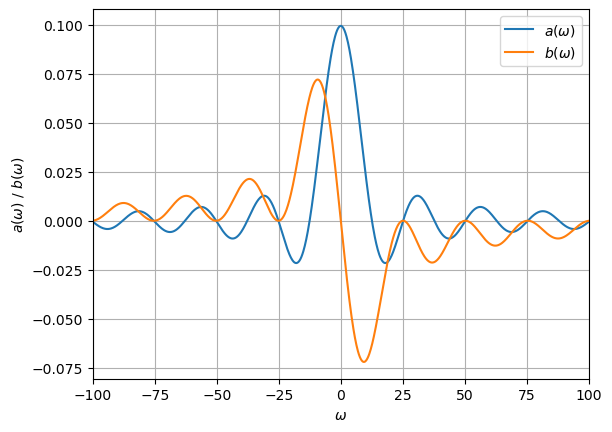

In [20]:
# Nr. 5 
# (c)
U0 = 2.5
t0 = 1/4

x = np.linspace(-100,100,1000)
a = U0/(2*np.pi) / x * np.sin(x*t0)
b = U0/(2*np.pi) / x * (np.cos(x*t0) - 1)

plt.plot(x,a,label=r"$a(\omega)$")
plt.plot(x,b,label=r"$b(\omega)$")

plt.xlabel(r"$\omega$")
plt.ylabel(r"$a(\omega)\ / \ b(\omega)$")
plt.grid()
plt.legend()
plt.xlim(x[0], x[-1])

plt.savefig("5c.png", dpi=500)